Nesta atividade, vamos aplicar os conceitos de multicolinearidade e homocedasticidade em um contexto diferente: o setor de energia. Utilizaremos esse dataset de uma usina de energia para explorar como esses conceitos podem afetar os nossos modelos de regressão. Vamos lá!

Sua tarefa envolve conduzir as seguintes etapas:

**Primeira etapa:** Verifique a multicolinearidade utilizando o conceito de VIF. Se houver indícios de multicolinearidade entre as variáveis, tente pensar em quais medidas podem ser tomadas. Para isso você deverá construir um modelo de regressão linear assumindo que a coluna PE é a variável y.

**Segunda etapa:** Realize uma análise de resíduos e identifique se há ou não heterocedasticidade nos dados.

In [420]:
import pandas as pd

df = pd.read_csv('usina.csv')
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [421]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [422]:
df.isnull().sum() # Não há dados nulos

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [423]:
# Cálculo da correlação
corr = df.corr()

# Exibindo a correlação da variável PE
corr['PE']

AT   -0.948128
V    -0.869780
AP    0.518429
RH    0.389794
PE    1.000000
Name: PE, dtype: float64

<Axes: >

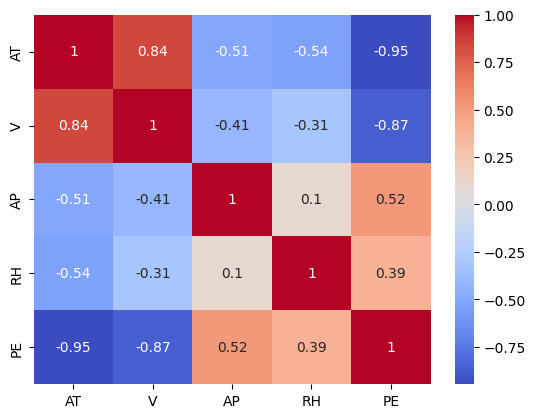

In [424]:
import seaborn as sns

sns.heatmap(corr, annot=True, cmap='coolwarm')

Gráfico de Dispersão para analisar a relação entre PE e as outras variáveis presentes no dataset.

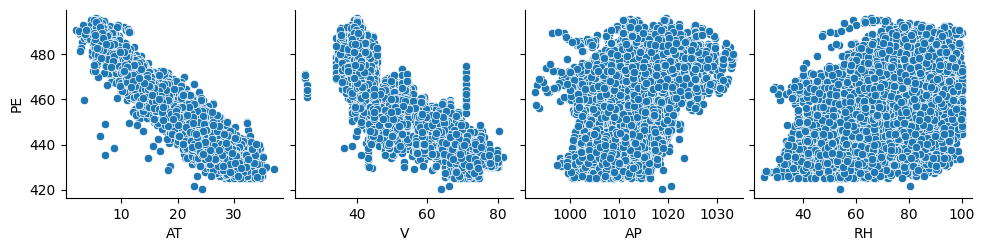

In [425]:
sns.pairplot(df, y_vars='PE', x_vars=['AT','V','AP','RH'])

<Axes: >

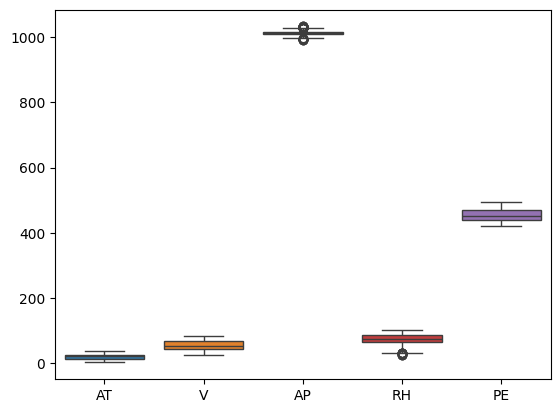

In [426]:
sns.boxplot(df)

Text(0.5, 1.0, 'Distribuição dos valores de PE')

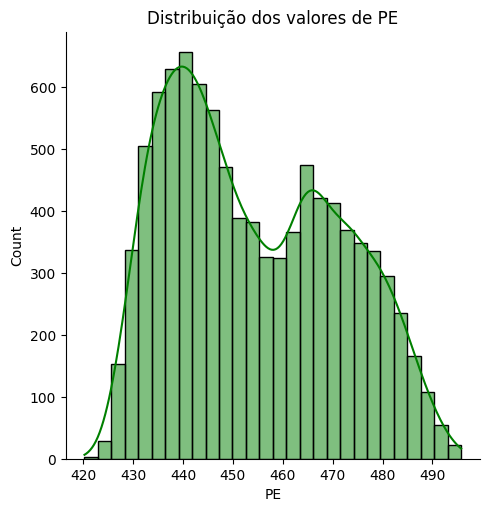

In [427]:
import matplotlib.pyplot as plt

# Histograma para analisar a distribuição do valor PE
sns.displot(df['PE'], kde=True, color='green')
plt.title("Distribuição dos valores de PE")

In [428]:
from sklearn.model_selection import train_test_split

X = df.drop('PE', axis=1)
y = df['PE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [429]:
# Treinando o modelo
from statsmodels.formula.api import ols

df_train = pd.DataFrame(X_train)
df_train['PE'] = y_train

# Relação entre PE e (~) AP
model_mc = ols('PE ~ AP', data=df_train).fit()

print(model_mc.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     2356.
Date:                Sun, 10 Nov 2024   Prob (F-statistic):               0.00
Time:                        22:40:22   Log-Likelihood:                -27483.
No. Observations:                6697   AIC:                         5.497e+04
Df Residuals:                    6695   BIC:                         5.498e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1027.0044     30.518    -33.653      0.0

É possível observar que o modelo com os dados da coluna *AP* apresentam **Multicolinearidade**, vamos tentar remover e tentar com todas as outras variáveis, exceto *AP*.

In [430]:
# Relação entre PE e (~) AT + V + RH
model = ols('PE ~ AT + V + RH', data=df_train).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.916e+04
Date:                Sun, 10 Nov 2024   Prob (F-statistic):               0.00
Time:                        22:40:22   Log-Likelihood:                -19639.
No. Observations:                6697   AIC:                         3.929e+04
Df Residuals:                    6693   BIC:                         3.931e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    518.5927      0.461   1126.110      0.0

Agora que removemos a variável *AP* a **Multicolinearidade** não está mais presente no nosso modelo.

Vamos agora criar nosso modelo de forma diferente, sem formula.

In [431]:
import statsmodels.api as sm

# Antes de realizar o treinamento, devemos remover a coluna AP do X_train para não dar o problema de Multicolinearidade
X_train.drop('AP', axis=1, inplace=True)
X_test.drop('AP', axis=1, inplace=True)

# Adicionamos a constante para o modelo
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

model_ols = sm.OLS(y_train, X_train).fit()
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.916e+04
Date:                Sun, 10 Nov 2024   Prob (F-statistic):               0.00
Time:                        22:40:22   Log-Likelihood:                -19639.
No. Observations:                6697   AIC:                         3.929e+04
Df Residuals:                    6693   BIC:                         3.931e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        518.5927      0.461   1126.110      0.0

In [432]:
from sklearn.metrics import r2_score
# Comparando o R² dos dados de teste
y_predict = model_ols.predict(X_test)

# Apresenta o R² bem próximo do valor de R² com os dados de treino
print(f'R²: {r2_score(y_test, y_predict)}') 

R²: 0.9270059210787497


In [433]:
model_ols.params

const    518.592742
AT        -2.036823
V         -0.222578
RH        -0.165546
dtype: float64

In [434]:
# Analisando a Multicolinearidade com VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_1 = pd.DataFrame()
vif_1['variavel'] = X_train.columns

vif_1['vif'] = [variance_inflation_factor(X_train, i) for i in range(len(X_train.columns))]
vif_1

,variavel,vif
0,const,68.767821
1,AT,4.940136
2,V,3.841137
3,RH,1.595233


É possível observar que as variáveis AT estão próximos de serem considerados como variáveis que apresentam *Multicolinearidade* (acima de 5 já é considerado). Por enquanto, não vamos interpretar isto como um problema.

Abaixo, uma comparação entre os dados previstos x dados reais.

In [435]:
import plotly.express as px

# Prevendo os valores do treino X_train
y_predict_train = model_ols.predict(X_train)

# Gráfico para análise dos resíduos com os dados de treino
px.scatter(x=y_predict_train, y=y_train,
           title='Previsão X Real',
           trendline='ols',
           trendline_color_override='red',
           labels = {'x': 'PE', 'y': 'PE real'})

### Gráfico de dispersão para identificar **Homocedasticidade**

In [436]:
model_ols.resid

8759   -8.829666
1434    4.042438
7320   -2.028595
2579   -2.697436
9142   -6.939770
          ...   
5734   -5.053704
5191    3.213401
5390   -3.953255
860     1.547149
7270    2.969295
Length: 6697, dtype: float64

Text(0, 0.5, 'Resíduos')

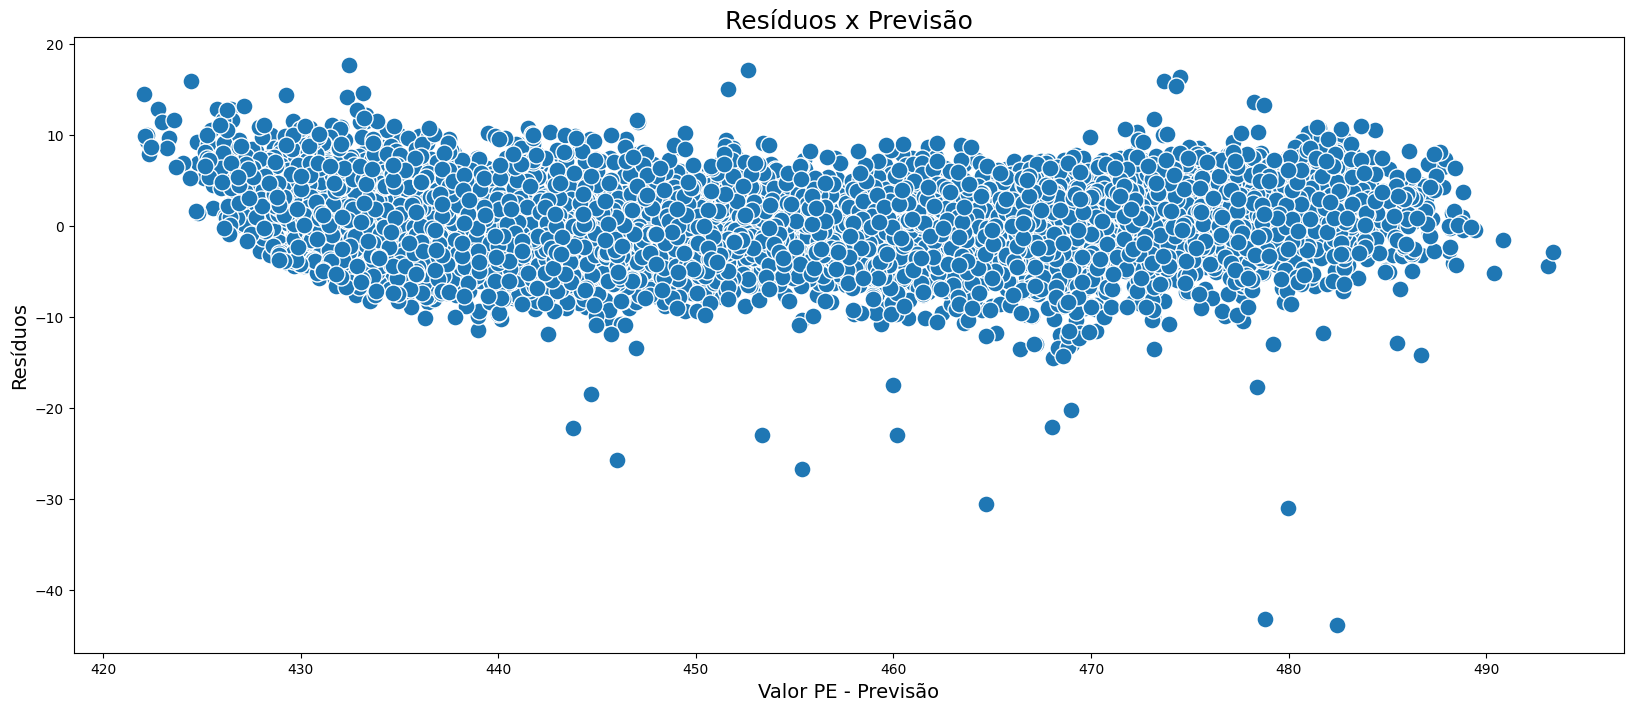

In [437]:
# s=150 aumenta o tamanho dos pontos
ax = sns.scatterplot(x=y_predict_train, y=model_ols.resid, s=150)
ax.figure.set_size_inches(20,8)
ax.set_title("Resíduos x Previsão", fontsize=18)
ax.set_xlabel('Valor PE - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)

É possível observar que o gráfico apresenta uma boa distribuição dos dados e estão bem próximos de zero, ou seja, está errando pouco. Portanto, podemos considerar que este modelo de Regressão linear apresenta **Homocedasticidade**.

### Identificação da **Heterocedasticidade**

No gráfico abaixo fica bem claro um padrão no gráfico de resíduos x previsão, portanto, é certo confirmar que este modelo de regressão linear apresenta **Heterocedasticidade** por conta que é uma variável que apresenta **Multicolinearidade**, como identificamos acima.

In [438]:
# Consequentemente, os erros
model_mc.resid

8759     5.889003
1434    -1.257751
7320    -3.987335
2579    -8.196708
9142   -10.340507
          ...    
5734    -6.163273
5191     6.142428
5390   -18.803057
860     14.328192
7270    10.920341
Length: 6697, dtype: float64

Text(0, 0.5, 'Resíduos')

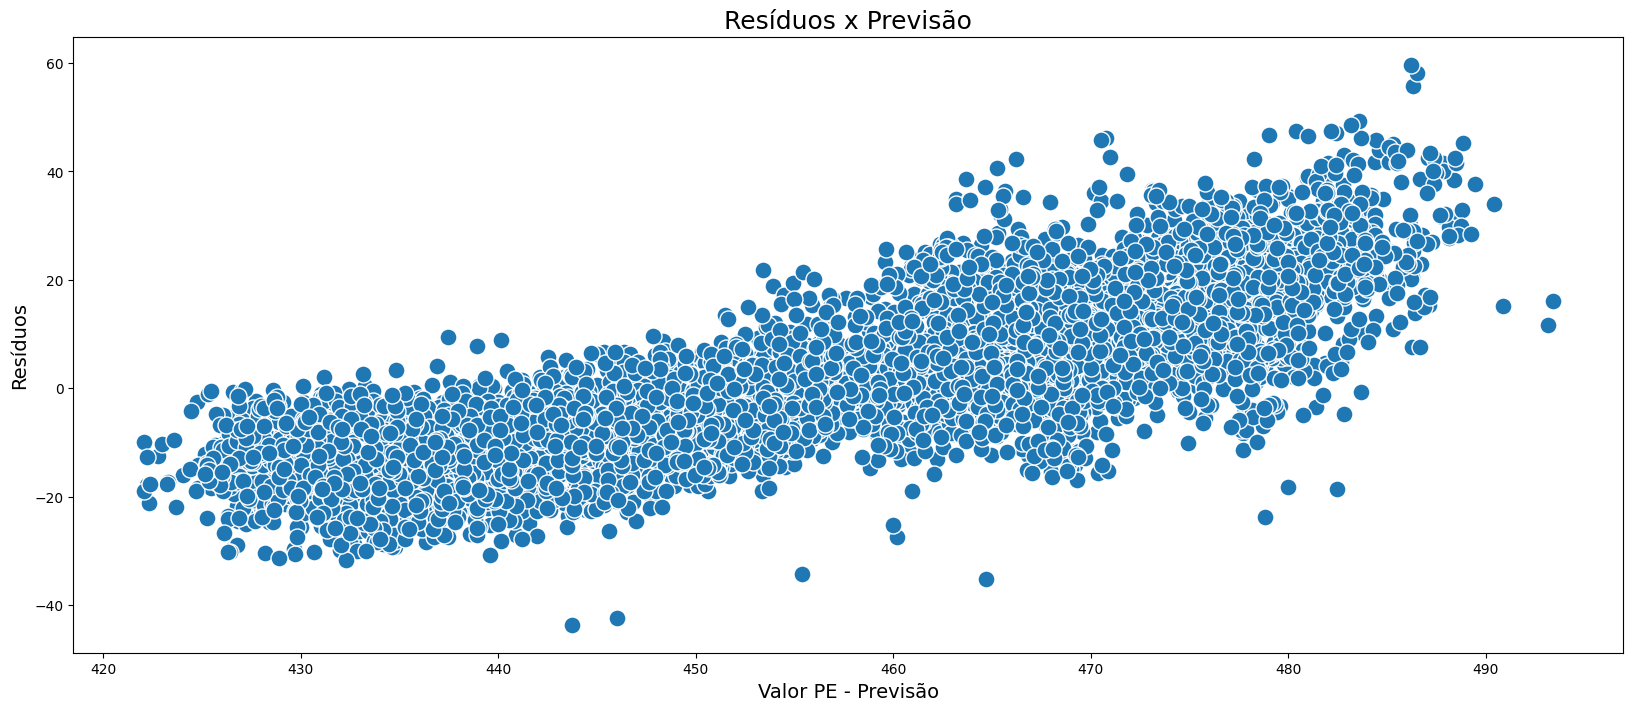

In [439]:
# s=150 aumenta o tamanho dos pontos
ax = sns.scatterplot(x=y_predict_train, y=model_mc.resid, s=150)
ax.figure.set_size_inches(20,8)
ax.set_title("Resíduos x Previsão", fontsize=18)
ax.set_xlabel('Valor PE - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)